<b><font size="6">03. Feature Selection</font></b><br><br>

**Feature Selection** is the process to select automatically or manually a subset of
relevant features to use in model building.
<br>
# <font color='#BFD72F'>Contents</font> <a class="anchor" id="toc"></a>    
    
* [1. The needed steps](#1st-bullet)<br>
    * [1.1 Import the needed libraries](#2nd-bullet)<br>
    * [1.2 Import the dataset](#3rd-bullet)<br>
    * [1.3. Data pre-processing, data partition and scaling](#4th-bullet)<br>
    
* [2. Feature Selection](#5th-bullet)<br>
    * [2.1 Filter methods](#6th-bullet)<br>
        * [2.1.1 Univariate variables](#7th-bullet)<br>
        * [2.1.2 Spearman Correlation](#8th-bullet)<br>
        * [2.1.3 Chi-Square](#9th-bullet)<br>
    * [2.2 Wrapper Methods](#10th-bullet)<br>
        * [2.2.1 RFE](#11th-bullet)<br>
    * [2.3 Embedded Methods](#12th-bullet)<br>
        * [2.3.1 Lasso](#13th-bullet)<br>
    * [2.4 Final Insights](#14th-bullet)<br>    

<br>

# 1. The needed steps <a class="anchor" id="1st-bullet"></a>
[Back to Contents](#toc)

<a class="anchor" id="2nd-bullet">

### 1.1. Import the needed libraries
    
</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="3rd-bullet">

### 1.2. Import the dataset
    
</a>

__`Step 1`__ Import the dataset __titanic.csv__

`INPUT VARIABLES`: numerical and categorical <br>
`OUPUT VARIABLE`: numeric (binary classification) <br>

__GOAL__: Predict survival on the Titanic

`Age` : passenger age in years <br>
`Cabin` : cabin number <br>
`Embarked` : Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton <br>
`Fare`: Passenger fare <br>
`Name` : Passenger name <br>
`Parch`: # of parents / children aboard the Titanic <br>
`PassengerId`: Passenger unique identification <br>
`Pclass`: Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd <br>
`Sex`: passenger gender <br>
`SibSp`: # of siblings / spouses aboard the Titanic <br>
`Survived`: Survival (Dependent variable): 0 = No, 1 = Yes <br>
`Ticket`: Ticket number <br>
`Title`: Passenger title <br>
`Family_Size`: Number of family members onboard <br>
`Embark_Hour`: Embark Hour (from 7:00 till 20:00)<br>
`Embarked_Flag`: Embark Flag: 0 = No, 1 = Yes<br>


In [3]:
titanic = pd.read_csv(r'data/titanic.csv')
titanic.head(3)

Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   

   Pclass     Sex  SibSp  Survived            Ticket Title  Family_Size  \
0       3    male      1         0         A/5 21171    Mr            1   
1       1  female      1         1          PC 17599   Mrs            1   
2       3  female      0         1  STON/O2. 3101282  Miss            0   

   Embark_hour  Embarked_Flag  
0           10              1  
1           13              1  
2            7              1

<a class="anchor" id="4th-bullet">


### 1.3. Data pre-processing, data partition and scaling

</a>



__`Step 2`__ Define the variable `PassengerId` as the new index

In [4]:
titanic.set_index('PassengerId', inplace = True)

__`Step 3`__ Define the independent variables as __X__ and the dependent variable ('Survived') as __y__. 

In [5]:
X = titanic.drop('Survived', axis = 1)
y = titanic['Survived']

__`Step 4`__ By using the method `train_test_split` from `sklearn.model_selection`, split your dataset into train(70%) and validation(30%).

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, random_state = 0, stratify = y, shuffle = True)

__`Step 5`__ Check if there are any missing values in the datasets.

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 232 to 81
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            623 non-null    float64
 1   Cabin          143 non-null    object 
 2   Embarked       623 non-null    object 
 3   Fare           623 non-null    float64
 4   Name           623 non-null    object 
 5   Parch          623 non-null    int64  
 6   Pclass         623 non-null    int64  
 7   Sex            623 non-null    object 
 8   SibSp          623 non-null    int64  
 9   Ticket         623 non-null    object 
 10  Title          623 non-null    object 
 11  Family_Size    623 non-null    int64  
 12  Embark_hour    623 non-null    int64  
 13  Embarked_Flag  623 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 73.0+ KB


In [8]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 422 to 608
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            268 non-null    float64
 1   Cabin          61 non-null     object 
 2   Embarked       268 non-null    object 
 3   Fare           268 non-null    float64
 4   Name           268 non-null    object 
 5   Parch          268 non-null    int64  
 6   Pclass         268 non-null    int64  
 7   Sex            268 non-null    object 
 8   SibSp          268 non-null    int64  
 9   Ticket         268 non-null    object 
 10  Title          268 non-null    object 
 11  Family_Size    268 non-null    int64  
 12  Embark_hour    268 non-null    int64  
 13  Embarked_Flag  268 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 31.4+ KB


__`Step 6`__ There are missing values in the variable 'Cabin'. Fill those with 'Unknown'.

In [9]:
X_train['Cabin'].fillna('Unknown', inplace = True)
X_val['Cabin'].fillna('Unknown', inplace = True)

**_Note_**: You should not use any information from the validation / test dataset to fill the missing values. 
Let's imagine that you have missing values on age and you want to fill those missing values with the median. You should compute the median value of age for the train dataset (suppose is 35) and fill the missing values in train, validation and test set (if available) with the median in the train dataset (35).

__`Step 7`__ Depending on the **feature selection technique** used, the input variables can differ - some techniques work only with **numerical** variables while others with **categorical** data. Define a new object named a `X_train_num` where only the numerical variables are mantained, and a object named as `X_train_cat` with all the categorical independent variables. Do the same for the validation data.

In [10]:
# Numerical data
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)

# Categorical data
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)
X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

__`Step 8`__ Using the `MinMaxScaler` from `sklearn`, scale the numerical data between 0 and 1.

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num) # this will return an array
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns, index = X_train.index) # Convert the array to a pandas dataframe
X_train_num_scaled.head(5)

Age      Fare  Parch  Pclass  SibSp  Family_Size  \
PassengerId                                                          
232          0.359135  0.015176    0.0     1.0  0.000          0.0   
837          0.258608  0.016908    0.0     1.0  0.000          0.0   
640          0.371701  0.031425    0.0     1.0  0.125          0.1   
390          0.208344  0.023422    0.0     0.5  0.000          0.0   
598          0.610455  0.000000    0.0     1.0  0.000          0.0   

             Embark_hour  Embarked_Flag  
PassengerId                              
232             0.538462            0.0  
837             0.923077            0.0  
640             0.461538            0.0  
390             0.846154            0.0  
598             0.384615            0.0

__`Step 8B`__ Using the scaler, scale the numerical validation data also between 0 and 1.

**_Note_**: In the same way you did for filling the missing values, the scaling should also consider only the training data. In that way, we are going to use the minimum and maximum values of the training dataset for each variable (the MinMaxScaler use those values to scale the data) to scale also the validation dataset.

In [12]:
X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns, index = X_val.index)
X_val_num_scaled.head(5)

Age      Fare  Parch  Pclass  SibSp  Family_Size  \
PassengerId                                                          
422          0.258608  0.015094    0.0     1.0   0.00          0.0   
619          0.044986  0.076123    0.2     0.5   0.25          0.3   
117          0.880623  0.015127    0.0     1.0   0.00          0.0   
311          0.296306  0.162314    0.0     0.0   0.00          0.0   
58           0.352852  0.014110    0.0     1.0   0.00          0.0   

             Embark_hour  Embarked_Flag  
PassengerId                              
422             0.846154            0.0  
619             0.000000            0.0  
117             0.769231            0.0  
311             0.923077            0.0  
58              0.076923            0.0

<br>

# 2. Feature Selection <a class="anchor" id="5th-bullet"></a>
[Back to Contents](#toc)

<a class="anchor" id="6th-bullet">

## 2.1. Filter methods
    
</a>

<a class="anchor" id="7th-bullet">

### 2.1.1. Univariate variables
    
</a>

__`Step 9`__ Check if any of the numerical variables is univariate (variance is equal to 0). Drop those variables if existent.

In [13]:
X_train_num_scaled.var()

Age              0.027272
Fare             0.011154
Parch            0.023316
Pclass           0.177015
SibSp            0.018076
Family_Size      0.024252
Embark_hour      0.095687
Embarked_Flag    0.000000
dtype: float64

The Embarked Flag is univariate. We can drop it in the train and in the validation dataset.

In [14]:
X_train_num_scaled.drop('Embarked_Flag', axis = 1, inplace = True)
X_val_num_scaled.drop('Embarked_Flag', axis = 1, inplace = True)
X_train_num_scaled.head(3)

Age      Fare  Parch  Pclass  SibSp  Family_Size  \
PassengerId                                                          
232          0.359135  0.015176    0.0     1.0  0.000          0.0   
837          0.258608  0.016908    0.0     1.0  0.000          0.0   
640          0.371701  0.031425    0.0     1.0  0.125          0.1   

             Embark_hour  
PassengerId               
232             0.538462  
837             0.923077  
640             0.461538

<a class="anchor" id="8th-bullet">

### 2.1.2. Spearman Correlation
    
</a>

__`Step 10`__ We are going to check now the spearman correlation between the variables. First we need to create a new dataframe with all the training data, but containing also the dependent variable, so we can check if any of the independent variables are correlated with the target. Name this new dataframe as `all_train_num`. 

In [15]:
all_train_num = X_train_num_scaled.join(y_train)
all_train_num.head()

Age      Fare  Parch  Pclass  SibSp  Family_Size  \
PassengerId                                                          
232          0.359135  0.015176    0.0     1.0  0.000          0.0   
837          0.258608  0.016908    0.0     1.0  0.000          0.0   
640          0.371701  0.031425    0.0     1.0  0.125          0.1   
390          0.208344  0.023422    0.0     0.5  0.000          0.0   
598          0.610455  0.000000    0.0     1.0  0.000          0.0   

             Embark_hour  Survived  
PassengerId                         
232             0.538462         0  
837             0.923077         0  
640             0.461538         0  
390             0.846154         1  
598             0.384615         0

__`Step 11`__ Create a function to plot the correlation between the variables named `cor_heatmap()` that should take as parameters the correlation table `cor`. Define the following conditions in the function:
- the size of the figure should be (12,10)
- create a heatmap using seaborn package where: 
    - `data` should be equal to the correlation table
    - `annot = True`
    - `cmap = plt.cm.Reds`
    - `fmt='.1'`

In [16]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

__`Step 12`__ Check the spearman correlation of the __all_train__ dataset by applying the method `corr()` and assign it to the object `cor_spearman`

In [17]:
cor_spearman = all_train_num.corr(method ='spearman')
cor_spearman

Age      Fare     Parch    Pclass     SibSp  Family_Size  \
Age          1.000000  0.123516 -0.267658 -0.346782 -0.181353    -0.224610   
Fare         0.123516  1.000000  0.406760 -0.692305  0.440321     0.530875   
Parch       -0.267658  0.406760  1.000000 -0.054721  0.425728     0.790648   
Pclass      -0.346782 -0.692305 -0.054721  1.000000 -0.046027    -0.101938   
SibSp       -0.181353  0.440321  0.425728 -0.046027  1.000000     0.843924   
Family_Size -0.224610  0.530875  0.790648 -0.101938  0.843924     1.000000   
Embark_hour -0.040375  0.016668  0.047823  0.000058  0.042666     0.045338   
Survived    -0.044222  0.334263  0.147893 -0.351056  0.083890     0.170758   

             Embark_hour  Survived  
Age            -0.040375 -0.044222  
Fare            0.016668  0.334263  
Parch           0.047823  0.147893  
Pclass          0.000058 -0.351056  
SibSp           0.042666  0.083890  
Family_Size     0.045338  0.170758  
Embark_hour     1.000000  0.064301  
Survived        0.064301  1.000000

__`Step 13`__ Call the function `cor_heatmap()` to the correlation table `cor_spearman`

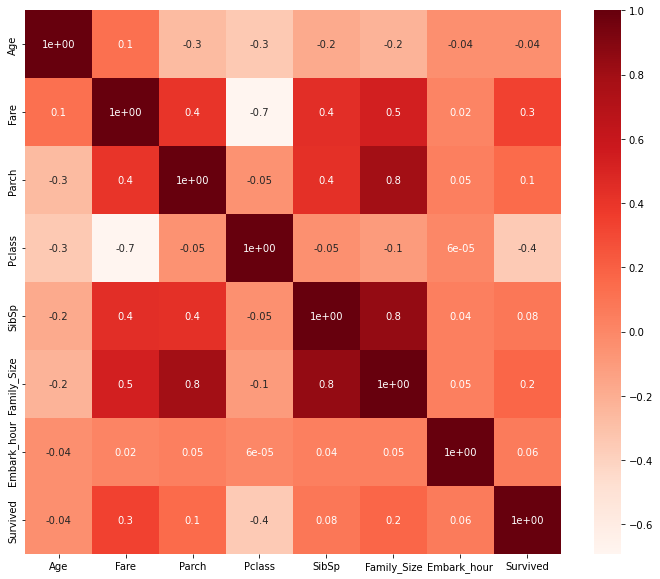

In [18]:
cor_heatmap(cor_spearman)

We can conclude that:
- There is no independent variable highly correlated with the target. We need to use other feature selection techniques to get more insights.
- There are two pairs of variables highly correlated, namely:
    - Parch vs Family_Size (0.8) <br>
    - SibSp vs Family_Size (0.8) <br>

We need to use other techniques of feature selection to decide which variables should we keep (another possible approach was to remove the Family_Size since it is correlated with both variables, but maybe this can have a higher influence on the target).

<a class="anchor" id="9th-bullet">

### 2.1.3. Chi-Square for categorical data

</a>

This time we are going to check the importance of the categorical independent variables in the target. For that, we are going to use the dataset `X_train_cat`.

__`Step 14`__ Create a function named as `TestIndependence` that should receive as arguments the dataset of independent variables, the target, the name of each independent variable and the alpha defined. This function will follow the steps of chi-square to check if a independent variable is an important predictor.

In [19]:
def TestIndependence(X, y, var, alpha=0.05):        
    dfObserved = pd.crosstab(y, X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p < alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

__`Step 15`__ For all the categorical variables available on `X_train_cat`, call the function `TestIndependence`.

In [20]:
for var in X_train_cat:
    TestIndependence(X_train_cat[var],y_train, var)

Cabin is IMPORTANT for Prediction
Embarked is IMPORTANT for Prediction
Name is NOT an important predictor. (Discard Name from model)
Sex is IMPORTANT for Prediction
Ticket is IMPORTANT for Prediction
Title is IMPORTANT for Prediction


According to chi-square, the only categorical variable that we should discard for the final model is the `Name`. 

<a class="anchor" id="10th-bullet">

### 2.1.4. Visualize the weight of the dependent variable in categorical data

</a>

In this step, we are going to create two plots to check the weight that the dependent variable has in the different labels of a categorical variable. <br><br>
The first plot will represent the frequency of each value of the dependent variable in the different categories, and the second plot will make this representation more intuitive by checking the proportion of the presence of each label of the depedent variable in each category. <br><br>
Sometimes it can be useful not only to use more advanced techniques like the ones we saw previously, but also to explore visually the variables that we have, like we are going to do in this step.

While in the example given you can visualize this relation only to categorical data, you can create your own function where numerical data is split into bins to have a similar visualization.


__`Step 16`__ Create a function where you can visualize the proportion of the presence of each label of the dependent variable in each possible value of a categorical feature. Check the "weight" of the variable `Sex`.

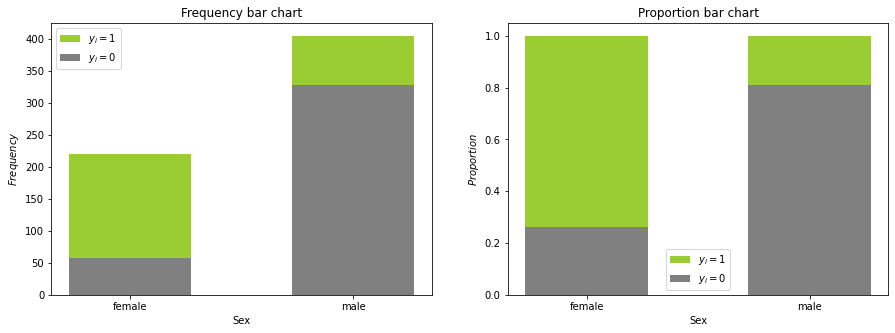

In [21]:
# first join all the training data
all_train = X_train.join(y_train)


def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Proportion$")

    plt.show()
    
bar_charts_categorical(all_train, "Sex", "Survived")

<a class="anchor" id="11th-bullet">

## 2.2. Wrapper Methods
    
</a>

<a class="anchor" id="12th-bullet">

### 2.2.1. RFE
    
</a>

This time we are going to apply Recursive Feature Elimination (RFE / Backwards) that will allow to select the most important features to keep. The base estimator used will be a Logistic Regression.


__`Step 17`__ Using LogisticRegression, create a Logistic Regression Classifier instance called `model`

In [22]:
model = LogisticRegression()

__`Step 18`__ Using RFE, create a RFE instance called `rfe` and initialize by defining the following parameters:
- `estimator` = model
- `n_features_select` = 3

In [23]:
rfe = RFE(estimator = model, n_features_to_select = 3)

__`Step 19`__ Transform the data using RFE by applying the method `fit_transform()` to the instance `rfe`, where `X` should be assigned to your independent variables and `y` to the dependent variable and assign it to the object `X_rfe`

In [24]:
X_rfe = rfe.fit_transform(X = X_train_num_scaled, y = y_train)

__`Step 20`__ Check the variables that were selected by RFE as the most "important" ones by calling the attribute `support_` to `rfe`.

In [25]:
X_train_num_scaled.columns

Index(['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Family_Size',
       'Embark_hour'],
      dtype='object')

In [26]:
rfe.support_

array([ True, False,  True,  True, False, False, False])

__`Step 21`__ Check the ranking of the variables defined by RFE as the most "important" ones by applying the attribute `ranking_` to `rfe`.

In [27]:
rfe.ranking_

array([1, 3, 1, 1, 2, 5, 4])

__`Step 22`__ Create an object (pandas Series) named `selected_features` that will have as index the `X_train_num` columns names and the `support_` attribute as value.

In [28]:
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features

Age             True
Fare           False
Parch           True
Pclass          True
SibSp          False
Family_Size    False
Embark_hour    False
dtype: bool

If you don't know apriori the number of features to select you can create a loop to check the score of the estimator using a different number of features. <br>
Below you have an example that will check the score of the estimator by chosing between 1 and 8 variables.

In [29]:
#no of features
nof_list=np.arange(1,7)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model, n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 3
Score with 3 features: 0.712687


According to RFE, the numerical variables that we should keep for the final model are `Age`, `Parch` and `PClass`.

<a class="anchor" id="15th-bullet">

## Final Insights:
    
</a>

<hr>

### Numerical Data

| Predictor | Spearman | RFE | Lasso | What to do? (One possible way to "solve") | 
| --- | --- | --- | --- |--- |
| Age | Discard | Keep | Keep | Include in the model |
| Fare | Discard | Discard | Keep ? | Discard |
| Parch | Discard | Keep | Keep ?| Include in the model |
| PClass | Discard | Keep | Keep | Include in the model |
| SibSp | Discard | Discard | Keep | Try with and without |
| Family_Size | Discard | Discard | Discard |  Discard |
| Embark_Hour | Discard | Discard | Discard |  Discard |

<hr>


### Categorical Data

| Predictor | Chi-Square | 
| --- | --- | 
| Cabin | Keep |  
| Embarked | Keep | 
| Name | Discard|
| Sex | Keep | 
| Ticket | Keep | 
| Title | Keep |

<hr>

